### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

pd.set_option('display.max_columns', None)

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data_directory_path = os.path.join(os.getcwd(), 'data')
data_path = os.path.join(data_directory_path, 'Data.csv')

In [3]:
ratings = pd.read_csv(os.path.join(data_directory_path, 'Data.csv'))
ratings.columns = [col.lower().replace(' ', '_').strip('_') for col in ratings.columns]
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movies = pd.read_csv(os.path.join(data_directory_path, 'item.csv'))
movies.columns = [col.lower().replace(' ', '_').strip('_') for col in movies.columns]
movies.head()

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [5]:
users = pd.read_csv(os.path.join(data_directory_path, 'user.csv'))
users.columns = [col.lower().replace(' ', '_').strip('_') for col in users.columns]
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
ratings.shape

(100000, 4)

In [8]:
ratings.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [9]:
ratings.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [10]:
movies.head()

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      1681 non-null   int64 
 1   movie_title   1681 non-null   object
 2   release_date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   action        1681 non-null   int64 
 5   adventure     1681 non-null   int64 
 6   animation     1681 non-null   int64 
 7   childrens     1681 non-null   int64 
 8   comedy        1681 non-null   int64 
 9   crime         1681 non-null   int64 
 10  documentary   1681 non-null   int64 
 11  drama         1681 non-null   int64 
 12  fantasy       1681 non-null   int64 
 13  film-noir     1681 non-null   int64 
 14  horror        1681 non-null   int64 
 15  musical       1681 non-null   int64 
 16  mystery       1681 non-null   int64 
 17  romance       1681 non-null   int64 
 18  sci-fi        1681 non-null   int64 
 19  thrill

In [12]:
movies.shape

(1681, 22)

In [13]:
movies.describe()

,movie_id,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
movies.isnull().sum()

movie_id        0
movie_title     0
release_date    0
unknown         0
action          0
adventure       0
animation       0
childrens       0
comedy          0
crime           0
documentary     0
drama           0
fantasy         0
film-noir       0
horror          0
musical         0
mystery         0
romance         0
sci-fi          0
thriller        0
war             0
western         0
dtype: int64

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [16]:
users.shape

(943, 5)

In [17]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [18]:
users.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [19]:
len(set(ratings['user_id']))

943

**Observations:**

1. No missing data in any of the data sets

2. Age of users appears to be normally distributed with a slight right skew

3. Comedy and drama are the most popular movie types

4. Interested that there are 100,000 ratings by only 943 users. Thats almost 100 ratings per user 


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [20]:
non_genre_cols = ['movie_id', 'movie_title', 'release_date']
genre_cols = [col for col in movies.columns if col not in non_genre_cols]
num_movies_by_genre = movies[genre_cols].sum().sort_values(ascending=False)
num_movies_by_genre

drama          725
comedy         505
action         251
thriller       251
romance        247
adventure      135
childrens      122
crime          109
sci-fi         101
horror          92
war             71
mystery         61
musical         56
documentary     50
animation       42
western         27
film-noir       24
fantasy         22
unknown          1
dtype: int64

In [21]:
num_movies = len(movies)
total_tags = num_movies_by_genre.sum()
print(f'num movies - {num_movies}')
print(f'total genre tags - {total_tags}')
print(f'tags per movie - {total_tags / num_movies:.2f}')

num movies - 1681
total genre tags - 2892
tags per movie - 1.72


**Insights:**

1. Again it is clear that Drama and Comedy are by far the most popular genres.  They are ~3x and ~2x (respectively) the 3rd most popular 
2. On average, there are 1.72 tags per movie (including the "unknown" tag)


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [22]:
movies_no_unknown = movies[movies['unknown'] != 1]
movies_no_unknown.head()

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [23]:
print(len(movies))
print(len(movies_no_unknown))

1681
1680


In [24]:
movies_unknown = movies[movies['unknown'] == 1]
movies_unknown.head()

,movie_id,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Insights:**
There is one movie with an "unknown" tag

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [25]:
movies['total_genres'] = movies[genre_cols].sum(axis=1)
movies_w_mult_genre = movies[movies['total_genres'] > 1]
print(f'# movies with multiple genres - {len(movies)}')
movies_w_mult_genre[['movie_title', 'total_genres']].head(10)

# movies with multiple genres - 1681


,movie_title,total_genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
7,Babe,3
9,Richard III,2
10,Seven (Se7en),2
11,"Usual Suspects, The",2
13,"Postino, Il",2


In [26]:
movies_w_mult_genre['total_genres'].describe()

count    849.000000
mean       2.426384
std        0.696732
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: total_genres, dtype: float64

**Insights:**

849 movies have multiple genres


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [27]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_year'] = [date.year for date in movies['release_date']]

ratings_and_movies = ratings.merge(movies, on='movie_id')
ratings_w_meta_data = ratings_and_movies.merge(users, on='user_id')
ratings_w_meta_data['rating_timestamp'] = pd.to_datetime(ratings_w_meta_data['timestamp'], unit='s')
ratings_w_meta_data['rating_year'] = [date.year for date in ratings_w_meta_data['rating_timestamp']]
ratings_w_meta_data.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,total_genres,release_year,age,gender,occupation,zip_code,rating_timestamp,rating_year
0,196,242,3,881250949,Kolya,1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1997,49,M,writer,55105,1997-12-04 15:55:49,1997
1,196,257,2,881251577,Men in Black,1997-07-04,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4,1997,49,M,writer,55105,1997-12-04 16:06:17,1997
2,196,111,4,881251793,"Truth About Cats & Dogs, The",1996-04-26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1996,49,M,writer,55105,1997-12-04 16:09:53,1997
3,196,25,4,881251955,"Birdcage, The",1996-03-08,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1996,49,M,writer,55105,1997-12-04 16:12:35,1997
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",1994-01-01,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1994,49,M,writer,55105,1997-12-04 16:10:43,1997


In [28]:
numerical_cols = ['age']
categorical_and_ordinal_cols = ['gender', 'occupation', 'rating', 'release_year', 'rating_year']

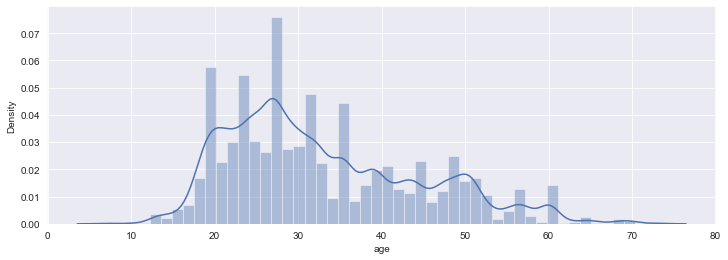

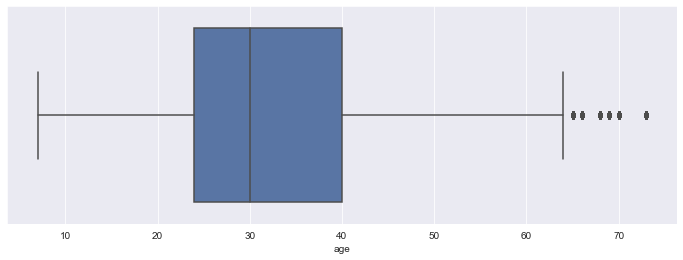

In [29]:
for col in numerical_cols:
    col_data = ratings_w_meta_data[col]
    sns.set({'figure.figsize':(12,4)})
    sns.distplot(col_data)
    plt.show()
    sns.set({'figure.figsize':(12,4)})
    sns.boxplot(col_data, orient='v')
    plt.show()

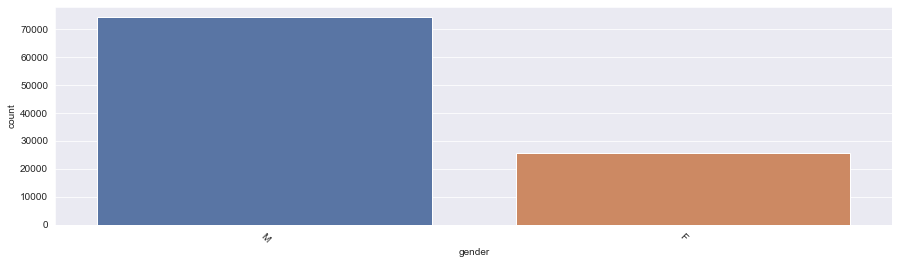

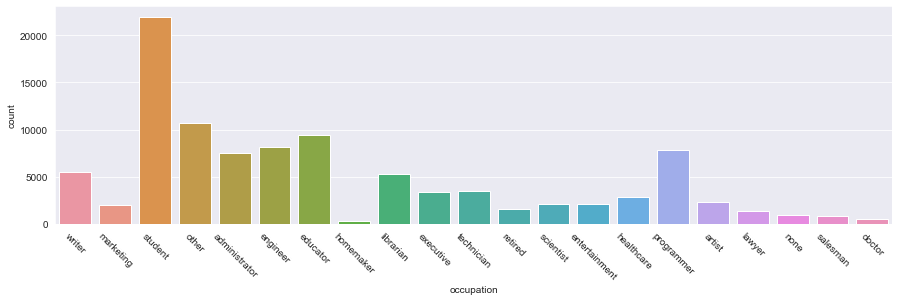

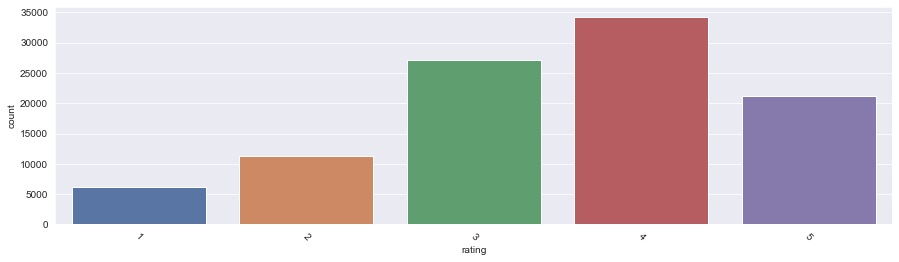

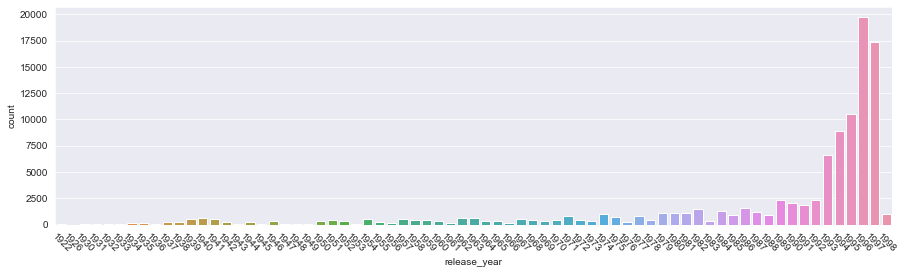

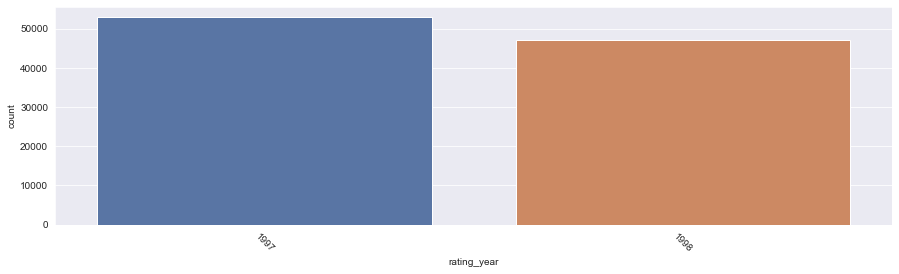

In [30]:
for col in categorical_and_ordinal_cols:
    sns.set({'figure.figsize':(15,4)})
    counts = sns.countplot(ratings_w_meta_data[col])
    plt.xticks(rotation=-45)
    plt.show()

Insights:

1. Substantially more males than females reviewing

2. Students are by far the largest group

3. Most reviews are from 1993 to 1997

4. Added in Rating year to understand when the ratings were made

Questions:

1. Do different age groups have the same distrubtion of ratings?

2. Do the two sexes have the same distribution of ratings?

2. Is there a relationship between reviewer age and release date? 

3. Was their bias toward older or newer movies?

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [31]:
relevant_cols = genre_cols + ['release_year']
genres_per_year = movies[relevant_cols].groupby(['release_year']).agg('sum').reset_index()
genres_per_year.head()

,release_year,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [32]:
relevant_cols =['release_year', 'movie_title']
movies_per_year = movies[relevant_cols].groupby(['release_year']).agg('count').reset_index()
movies_per_year.rename(columns={'movie_title': 'movies_released'}, inplace=True)
movies_per_year.sort_values('movies_released', ascending=False, inplace=True)
movies_per_year.head()

,release_year,movies_released
68,1996,355
69,1997,286
67,1995,219
66,1994,214
65,1993,126


In [33]:
genres_and_movies_per_year = movies_per_year.merge(genres_per_year, on='release_year')
for col in genre_cols:
    genres_and_movies_per_year[col] = genres_and_movies_per_year[col]  / genres_and_movies_per_year['movies_released']
genres_and_movies_per_year.sort_values('release_year', inplace=True) 
genres_and_movies_per_year.head()

,release_year,movies_released,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
70,1922,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,1926,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,1930,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,1931,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,1932,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


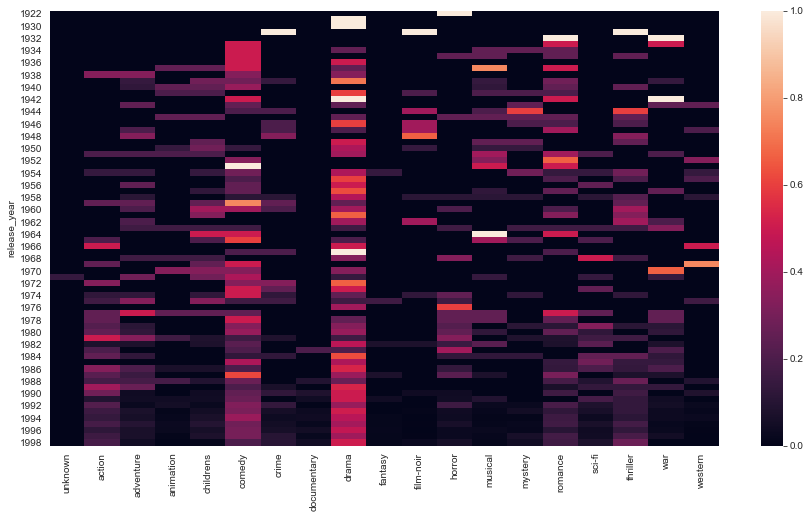

In [34]:
sns.set({'figure.figsize':(15,8)})
heat_map_data = genres_and_movies_per_year.set_index('release_year')
sns.heatmap(heat_map_data[genre_cols])
plt.show()

In [35]:
data = []
genres_and_movies_per_year.sort_values('release_year', inplace=True)
for col in genre_cols:
    trace = go.Scatter(
        x=genres_and_movies_per_year['release_year']
        , y=genres_and_movies_per_year[col]
        , name=col
    )
    data.append(trace)

layout = go.Layout(
    title='Movie Genre Popularity by Year'
    , autosize=True
    , xaxis={'title': 'Release Date'}
    , yaxis={'title': 'Pct Movies Release'}
)

fig = go.Figure(data=data, layout=layout)
fig.show()

**Insights:**

1. Drama has always been one of the most popular genres but is still the most popular today.  (is this because genre is often used with another tag)

2. Documentary was not a genre until 1983 (exact date available in plotly interactive plot)

3. Thriller, Romance, and Action have grown in popular in the most recent decades




Hint 2 is probably the wrong approach. You will double count movies with multiple tags. That brings up how to count "popularity" for movies with multiple tags, but I have decided to count each as a whole so total % of movies by tag will be greater than 100%.



### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [36]:
aggregations = {
    'rating': ['mean', 'median', 'std', 'count']
}

mean_movie_ratings = ratings_w_meta_data.groupby(['movie_id', 'movie_title']).agg(aggregations).reset_index()

mean_movie_ratings.columns = ['_'.join(col).strip('_') for col in mean_movie_ratings.columns]

relevant_movies = mean_movie_ratings[mean_movie_ratings['rating_count'] >= 100]
relevant_movies.sort_values('rating_mean', ascending=False, inplace=True)
relevant_movies.reset_index(inplace=True, drop=True)
relevant_movies.head(25)

,movie_id,movie_title,rating_mean,rating_median,rating_std,rating_count
0,408,"Close Shave, A",4.491071,5.0,0.771047,112
1,318,Schindler's List,4.466443,5.0,0.829109,298
2,169,"Wrong Trousers, The",4.466102,5.0,0.823607,118
3,483,Casablanca,4.456790,5.0,0.728114,243
4,64,"Shawshank Redemption, The",4.445230,5.0,0.767008,283
5,603,Rear Window,4.387560,5.0,0.712551,209
6,12,"Usual Suspects, The",4.385768,5.0,0.825500,267
7,50,Star Wars,4.358491,5.0,0.881341,583
8,178,12 Angry Men,4.344000,4.0,0.719588,125
9,134,Citizen Kane,4.292929,5.0,0.846042,198


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama
    
    ---- DISAGREE

In [37]:
ratings_w_meta_data.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,total_genres,release_year,age,gender,occupation,zip_code,rating_timestamp,rating_year
0,196,242,3,881250949,Kolya,1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1997,49,M,writer,55105,1997-12-04 15:55:49,1997
1,196,257,2,881251577,Men in Black,1997-07-04,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4,1997,49,M,writer,55105,1997-12-04 16:06:17,1997
2,196,111,4,881251793,"Truth About Cats & Dogs, The",1996-04-26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1996,49,M,writer,55105,1997-12-04 16:09:53,1997
3,196,25,4,881251955,"Birdcage, The",1996-03-08,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1996,49,M,writer,55105,1997-12-04 16:12:35,1997
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",1994-01-01,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1994,49,M,writer,55105,1997-12-04 16:10:43,1997


In [38]:
reviews_from_men = ratings_w_meta_data[ratings_w_meta_data['gender'] == 'M']
reviews_from_women = ratings_w_meta_data[ratings_w_meta_data['gender'] == 'F']

reviews_from_men_num = len(reviews_from_men)
reviews_from_women_num = len(reviews_from_women)
print(f'# reviews from men: {reviews_from_men_num}')
print(f'# reviews from women: {reviews_from_women_num}')

print('')


men_who_reviewed_num = len(set(reviews_from_men['user_id']))
women_who_reviewed_num = len(set(reviews_from_women['user_id']))
print(f'# men who reviewed: {men_who_reviewed_num}')
print(f'# women who reviewed: {women_who_reviewed_num}')

print('')

print(f'reviews per man: {reviews_from_men_num / men_who_reviewed_num:.1f}')
print(f'reviews per woman: {reviews_from_women_num / women_who_reviewed_num:.1f}')

# reviews from men: 74253
# reviews from women: 25738

# men who reviewed: 670
# women who reviewed: 273

reviews per man: 110.8
reviews per woman: 94.3


In [39]:
def get_string_of_sex_w_larger_num(male_count, female_count):
    if male_count > female_count:
        return 'men'
    elif male_count < female_count:
        return 'women'
    elif male_count == female_count:
        return 'no difference'


def analyze_genre_viewership_by_sex(df, genre):
    genre_reviews = df[df[genre] == 1]
    men_genre_reviews = genre_reviews[genre_reviews['gender'] == 'M']
    women_genre_reviews = genre_reviews[genre_reviews['gender'] == 'F']

    genre_reviews_num = len(genre_reviews)
    men_genre_reviews_num = len(men_genre_reviews)
    women_genre_reviews_num = len(women_genre_reviews)
    more_genre_reviews = get_string_of_sex_w_larger_num(men_genre_reviews_num, women_genre_reviews_num)
    print(f'Insight: {more_genre_reviews} rated more {genre} movies')
    print(f'    number of {genre} ratings by men: {men_genre_reviews_num:,.0f}')
    print(f'    number of {genre} ratings by women: {women_genre_reviews_num:,.0f}')

    print('')
    print('')

    men_w_genre_review_num = len(set(men_genre_reviews['user_id']))
    women_w_genre_review_num = len(set(women_genre_reviews['user_id']))
    more_unique_reviewers = get_string_of_sex_w_larger_num(men_genre_reviews_num, women_genre_reviews_num)
    print(f'Insight: more {more_unique_reviewers} rated {genre} movies')
    print(f'    number of men who rated {genre}: {men_w_genre_review_num:,.0f}')
    print(f'    number of women who rated {genre}: {women_w_genre_review_num:,.0f}')

    print('')
    print('')

    pct_of_men_that_reviewed_genre = men_w_genre_review_num / men_who_reviewed_num
    pct_of_women_that_reviewed_genre = women_w_genre_review_num / women_who_reviewed_num
    higher_pct_of_reviewers = get_string_of_sex_w_larger_num(pct_of_men_that_reviewed_genre, pct_of_women_that_reviewed_genre)
    print(f'Insight: a higher % of {higher_pct_of_reviewers} rated {genre} movies')
    print(f'    pct of men who rated {genre}: {pct_of_men_that_reviewed_genre:.1%}')
    print(f'    pct of women who rated {genre}: {pct_of_women_that_reviewed_genre:.1%}')

    print('')
    print('')

    pct_of_mens_reviews_from_genre = men_genre_reviews_num / reviews_from_men_num
    pct_of_women_reviews_from_genre = women_genre_reviews_num / reviews_from_women_num
    higher_pct_of_gender_reviews = get_string_of_sex_w_larger_num(pct_of_mens_reviews_from_genre, pct_of_women_reviews_from_genre)
    print(f"Insight: a higher % of {higher_pct_of_gender_reviews}'s reviews were {genre} movies")
    print(f"    pct of men's reviews that were {genre}: {pct_of_mens_reviews_from_genre:.1%}")
    print(f"    pct of women's reviews that were {genre}: {pct_of_women_reviews_from_genre:.1%}")

### Men watch more drama than women

In [40]:
analyze_genre_viewership_by_sex(ratings_w_meta_data, 'drama')

Insight: men rated more drama movies
    number of drama ratings by men: 28,887
    number of drama ratings by women: 11,008


Insight: more men rated drama movies
    number of men who rated drama: 670
    number of women who rated drama: 273


Insight: a higher % of no difference rated drama movies
    pct of men who rated drama: 100.0%
    pct of women who rated drama: 100.0%


Insight: a higher % of women's reviews were drama movies
    pct of men's reviews that were drama: 38.9%
    pct of women's reviews that were drama: 42.8%


### Women watch more Sci-Fi than men

In [41]:
analyze_genre_viewership_by_sex(ratings_w_meta_data, 'sci-fi')

Insight: men rated more sci-fi movies
    number of sci-fi ratings by men: 10,101
    number of sci-fi ratings by women: 2,629


Insight: more men rated sci-fi movies
    number of men who rated sci-fi: 652
    number of women who rated sci-fi: 256


Insight: a higher % of men rated sci-fi movies
    pct of men who rated sci-fi: 97.3%
    pct of women who rated sci-fi: 93.8%


Insight: a higher % of men's reviews were sci-fi movies
    pct of men's reviews that were sci-fi: 13.6%
    pct of women's reviews that were sci-fi: 10.2%


### Men watch more Romance than women

In [42]:
analyze_genre_viewership_by_sex(ratings_w_meta_data, 'romance')

Insight: men rated more romance movies
    number of romance ratings by men: 13,603
    number of romance ratings by women: 5,858


Insight: more men rated romance movies
    number of men who rated romance: 670
    number of women who rated romance: 273


Insight: a higher % of no difference rated romance movies
    pct of men who rated romance: 100.0%
    pct of women who rated romance: 100.0%


Insight: a higher % of women's reviews were romance movies
    pct of men's reviews that were romance: 18.3%
    pct of women's reviews that were romance: 22.8%


## **Conclusion:**

Due to the high number of reviews per reviewer, I am wondering where this data came from and if the users were truly free to choose any movies they wanted to review. Assuming there is no material bias here are my conclusions:

### Men watch more drama than women

    Answer: False.  42.8% of women's reviews were for Drama movies vs only 38.9% of men's reviews

### Women watch more Sci-Fi than men

    Answer: False. 13.6% of men's reviews were for Sci-Fi movies vs only 10.2% of women's reviews

### Men watch more Romance than women

    Answer: False.  22.8% of women's reviews were for Romance movies vs only 18.3% of men's reviews
